I'd like to learn OO in Python. I followed a clip on youtube:

(https://www.youtube.com/watch?v=iyXyxvs-544)

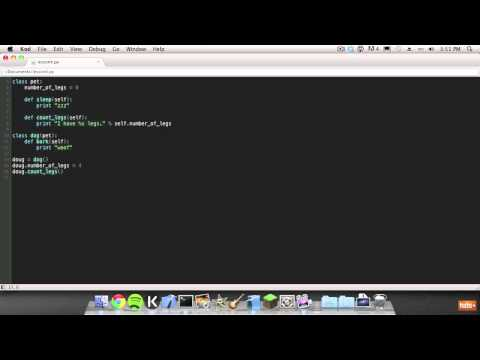

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("iyXyxvs-544")

In [2]:
class pet:
    number_of_legs=0
    
dog=pet()

dog.number_of_legs=4

print "Dog has %s legs." %dog.number_of_legs

Dog has 4 legs.


In [3]:
class pet:
    number_of_legs=0
    def sleep(self):
        print "zzZ"
    def count_legs(self):
        print "number of legs=%s" %self.number_of_legs
dog=pet()

dog.number_of_legs=4
dog.count_legs()

nemo=pet()
nemo.number_of_legs=0
nemo.count_legs()

dog.sleep()

number of legs=4
number of legs=0
zzZ


In [4]:
class pet:
    number_of_legs=0
    def sleep(self):
        print "zzZ"
    def count_legs(self):
        print "number of legs=%s" %self.number_of_legs

        
class dog(pet):
    def bark(self):
        print "汪汪汪~~~~~!"

In [5]:
doug=dog()
doug.bark()
doug.sleep()
doug.number_of_legs=4
doug.count_legs()

汪汪汪~~~~~!
zzZ
number of legs=4


I realized I can print Chinese without problem.

Okay. Now let's learn more about OO in Python. 

Another example (cashing-in-out from a bank) I found is :

(which is from https://www.jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/ )

In [6]:
class Customer:
    """A customer of ABC Bank with a checking account. Customers have the
    following properties:

    Attributes:
        name: A string representing the customer's name.
        balance: A float tracking the current balance of the customer's account.
    """

    def __init__(self, name, balance=0.0):
        """Return a Customer object whose name is *name* and starting
        balance is *balance*."""
        self.name = name
        self.balance = balance

    def withdraw(self, amount):
        """Return the balance remaining after withdrawing *amount*
        dollars."""
        if amount > self.balance:
            raise RuntimeError('Amount greater than available balance.')
        self.balance -= amount
        return self.balance

    def deposit(self, amount):
        """Return the balance remaining after depositing *amount*
        dollars."""
        self.balance += amount
        return self.balance

In [7]:
a=Customer("Bill",100)
a.withdraw(70.)
a.withdraw(40.)

RuntimeError: Amount greater than available balance.

In [8]:
b=Customer("John",100)
b.deposit(1000.)

1100.0

In the above example, we have two objects: "name" and "balance". We have two methods dealing with these two objects: "withdraw" and "deposit". I think, in OO terminology, we manipulate objects by methods. These objects and methods live within a certain class.

Interesting.

Now I'm moving to the book:

Python Scripting for Computational Science by Hans Petter Langtangen.

By the way, the use of the lambda function:

In [9]:
g=lambda x:x**3
g(3)

27

or, in general, we can write a function as:

In [10]:
def p(x): return x**3
p(3)

27

Now I'll perform integration, using rectangular method.
First, let's see if I can easily finish the code:

In [11]:
import numpy as np

In [12]:
# integrating sin(x) from 0 to 2pi: the answer should be 0.

In [13]:
x=np.linspace(0.,2.*np.pi,100.)
f=lambda x: np.sin(x)
interval=x[1]-x[0]
np.sum(interval*f(x))

-2.3351069328536359e-17

In [14]:
# integrating x^3 from 0 to 1: the answer should be 0.25

In [15]:
x=np.linspace(0.,1.,1.E7)
f=lambda x: x**3
interval=x[1]-x[0]
np.sum(interval*f(x))

0.25000005000000763

Now, let's increase the complexity (using OO).

Before doing so, I'd like to know why I would like to learn OO. It's probably true that I can achieve the same goal by writing functions. 

Anyway, is it easier to maintain my code if I write my code in OO style?

I think it does. It's probably very useful if we have many objects all belong to one class.

(See: http://stackoverflow.com/questions/2078978/functional-programming-vs-object-oriented-programming for a comparison between functional programming and object-oriented programming)

To make sure I understand the basics, let's try to write a code, which contains a main class: "play_with_the_function". Within it, we have methods "trapzint"(which will integrate the function) and "plot"(which will plot the function). Also, we have: function, number of discrete points and a range of the function.

Before we start, let's review some basics for plotting function in Python:

In [16]:
import numpy as np
from matplotlib import pylab
%matplotlib inline

(0, 6.283185307179586)

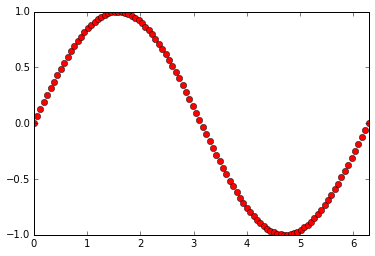

In [17]:
x=np.linspace(0.,2.*np.pi,100)
pylab.plot(x,np.sin(x),'ro') # plotting f(x) versus x using red dots.
pylab.xlim(xmin=0,xmax=2.*np.pi) # setting the range of x-axis for the plot.

#### Okay, now let's begin. What I'm going to do is just integrate a function using the trapezoidal rule.

In [18]:
import numpy as np
from matplotlib import pylab
%matplotlib inline

class play_with_the_function:
    def __init__(self,f,xrange,points):
        self.f=f; self.xrange=xrange; self.points=points
        self.x=np.linspace(self.xrange[0],self.xrange[1],self.points)
        self.fx=self.f(self.x)
    def trapzint(self):
        return np.trapz(self.fx,self.x)
    def plot(self,xmin,xmax):
        self.xmin=xmin
        self.xmax=xmax
        
        pylab.plot(self.x,self.fx,'ro')
        pylab.xlim(xmin=self.xmin,xmax=self.xmax)
        pylab.show()

In [19]:
f=lambda x: np.sin(x)
xrange=[0,np.pi]
points=10000
g=play_with_the_function(f,xrange,points)

In [20]:
g.trapzint()

1.999999983547369

Remark: the analytical solution is 2.

Okay, I've learned some basics. Bravo!